## Apply Data Cleaning to the Datasets and then apply Kmeans algorithm for find pattern and the best value of.the K for the following features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

There are 6 groups so ideally we should be having 6 clusters.

In [7]:
X = df.drop(columns=['quality'])
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [12]:
X_std = StandardScaler().fit_transform(X)

In [14]:
X_std.shape

(1599, 11)

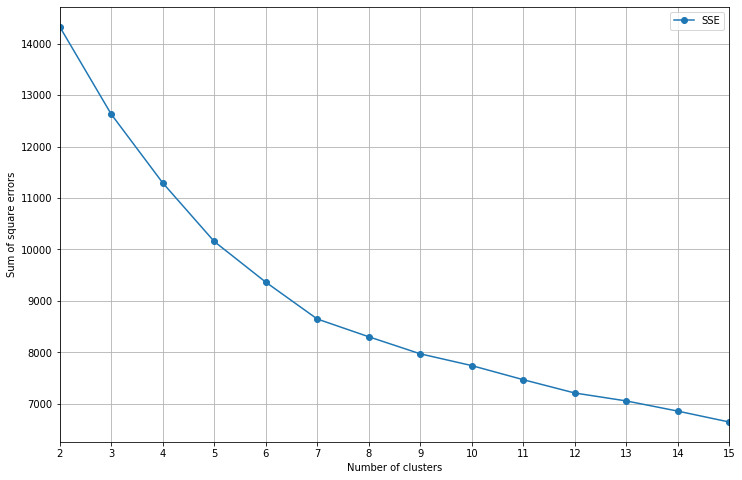

In [89]:
def find_cluster(x):
    cluster_range = range(2,16)
    cluster_errors = []

    for index,i in enumerate(cluster_range):
        cluster = KMeans(n_clusters=i).fit(x)
        cluster_errors.append(cluster.inertia_)

    cluster_plot = pd.DataFrame({'SSE':cluster_errors},index=cluster_range)
    cluster_plot.plot(marker='o',figsize=(12,8))
    plt.xticks(cluster_range)
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of square errors')
    plt.grid(True)
    plt.show()
    
find_cluster(X_std)

## Use features fixed acidity and volatile acidity

In [82]:
def compare_features(columns):
    fx_va = X[columns]
    fx_va = StandardScaler().fit_transform(fx_va)

    cluster = KMeans(n_clusters=6).fit(fx_va)

    df_new = pd.DataFrame(fx_va,columns=columns)
    df_new['clusters'] = cluster.labels_ + 3
    df_new['quality'] = df['quality']

    print(df_new.head())

    print(df_new['clusters'].value_counts().sort_index());print()
    print(df_new['quality'].value_counts().sort_index())
    
compare_features(['fixed_acidity','volatile_acidity'])

   fixed_acidity  volatile_acidity  clusters  quality
0      -0.528360          0.961877         6        5
1      -0.298547          1.967442         7        5
2      -0.298547          1.297065         7        5
3       1.654856         -1.384443         5        6
4      -0.528360          0.961877         6        5
3    330
4    246
5    156
6    449
7    141
8    277
Name: clusters, dtype: int64

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


## Use feautes residual suger and sulphades

In [83]:
compare_features(['residual_sugar','sulphates'])

   residual_sugar  sulphates  clusters  quality
0       -0.453218  -0.579207         5        5
1        0.043416   0.128950         8        5
2       -0.169427  -0.048089         8        5
3       -0.453218  -0.461180         5        6
4       -0.453218  -0.579207         5        5
3    290
4    107
5    577
6     40
7     11
8    574
Name: clusters, dtype: int64

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


## Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [84]:
compare_features(['free_sulfur_dioxide','total_sulfur_dioxide'])

   free_sulfur_dioxide  total_sulfur_dioxide  clusters  quality
0            -0.466193             -0.379133         4        5
1             0.872638              0.624363         8        5
2            -0.083669              0.229047         4        5
3             0.107592              0.411500         4        6
4            -0.466193             -0.379133         4        5
3     39
4    469
5     85
6    179
7    577
8    250
Name: clusters, dtype: int64

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


## Use feautes fixed acidity, citric acidity and volatile acidity

In [85]:
compare_features(['fixed_acidity','citric_acid','volatile_acidity'])

   fixed_acidity  citric_acid  volatile_acidity  clusters  quality
0      -0.528360    -1.391472          0.961877         3        5
1      -0.298547    -1.391472          1.967442         8        5
2      -0.298547    -1.186070          1.297065         8        5
3       1.654856     1.484154         -1.384443         4        6
4      -0.528360    -1.391472          0.961877         3        5
3    425
4    204
5    252
6    304
7    287
8    127
Name: clusters, dtype: int64

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


## Use feautes density and pH

In [86]:
compare_features(['density','pH'])

    density        pH  clusters  quality
0  0.558274  1.288643         7        5
1  0.028261 -0.719933         6        5
2  0.134264 -0.331177         3        5
3  0.664277 -0.979104         6        6
4  0.558274  1.288643         7        5
3    409
4    405
5    105
6    278
7    223
8    179
Name: clusters, dtype: int64

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64
